### 利用开源制图库cartopy进行gis数据可视化


In [1]:
import matplotlib.pyplot as plt
from osgeo import gdal
import numpy as np
from cartopy.io.shapereader import Reader
import cartopy.crs as ccrs
import cartopy.feature as cfeat


#### 矢量数据显示

In [2]:
path_kunming = 'data/Section-2/kunming_districts.shp'


In [45]:
proj = ccrs.PlateCarree()
kunming_geo = Reader(path_kunming).geometries()    ### 读入矢量
kunming_cfeat = cfeat.ShapelyFeature(kunming_geo, ccrs.PlateCarree())


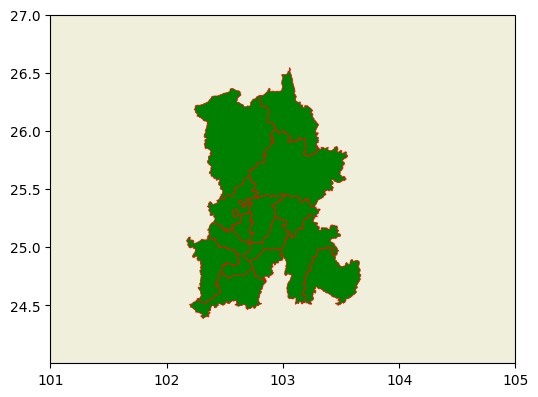

In [46]:
fig = plt.figure(figsize=(6,6))
x_ticks = [101, 102, 103, 104, 105]
y_ticks = [24.5, 25, 25.5, 26, 26.5, 27]
ax_geo = fig.add_subplot(111, projection=proj)
ax_geo.set_extent([101, 105, 24, 27])
ax_geo.add_feature(cfeat.LAND)
ax_geo.add_feature(kunming_cfeat, facecolor='green', edgecolor = 'red', linewidth=0.5)
ax_geo.set_xticks(x_ticks)
ax_geo.set_yticks(y_ticks)


#### 栅格数据显示

In [47]:
path_rsimg = 'data/Section-5/s2_chenggong_20200411_6bands_20m_wgs84.tif'
ds_rsimg = gdal.Open(path_rsimg)


In [51]:
array_rsimg = ds_rsimg.ReadAsArray()
array_rsimg = array_rsimg.transpose(1,2,0)
array_rsimg_ = np.clip(array_rsimg, 0, 2000)/2000  ## 直方图拉伸
array_rsimg_ = np.where(array_rsimg_==0, 1, array_rsimg_)
### 计算影像范围
ds_trans = ds_rsimg.GetGeoTransform()
lon_min, lat_max = ds_trans[0], ds_trans[3]
lon_max = lon_min + ds_trans[1] * ds_rsimg.RasterXSize
lat_min = lat_max + ds_trans[5] * ds_rsimg.RasterYSize
extent_rsimg = (lon_min, lon_max, lat_min, lat_max) 
extent_rsimg


(102.70864034390206,
 102.99381089981256,
 24.694382912987106,
 24.995729297438114)

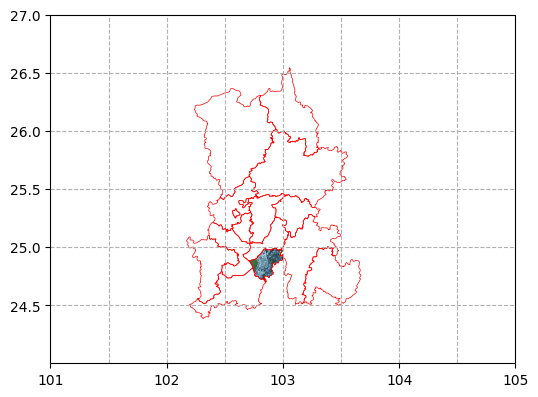

In [64]:
fig = plt.figure(figsize=(6,6))
x_ticks = [101, 102, 103, 104, 105]
y_ticks = [24.5, 25, 25.5, 26, 26.5, 27]
ax_geo = fig.add_subplot(111, projection=proj)
ax_geo.set_extent([101, 105, 24, 27])
# ax_geo.set_extent([102.6, 103., 24.6, 25])
ax_geo.imshow(array_rsimg_[:,:,0:3], extent=extent_rsimg)
ax_geo.add_feature(kunming_cfeat, facecolor='none', edgecolor = 'red', linewidth=0.5)
ax_geo.set_xticks(x_ticks)
ax_geo.set_yticks(y_ticks)
grid = ax_geo.gridlines(draw_labels=False, linestyle='--')


### 课后练习
利用cartopy展示呈贡区遥感影像，要求图像展示美观简洁。

